In [4]:
f = open('features.csv','r')
data = f.readlines()
f.close()
#Now let's deal a bit with it.
del data[0]

Xin = []
yin = []

for entry in data:
    block = entry.split(',')
    k = 0
    v = []
    for k in range(0,len(block)-1):
        v.append(float(block[k]))
    Xin.append(v)
    #And now the rough classification:
    t = float(block[-1].replace("\r\n",""))
    yin.append(t)


prices = []

for x in Xin:
    prices.append(x[0])

In [5]:
import matplotlib.pyplot as plt

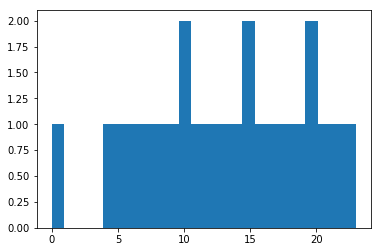

(array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1]), array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
         3.83333333,   4.79166667,   5.75      ,   6.70833333,
         7.66666667,   8.625     ,   9.58333333,  10.54166667,
        11.5       ,  12.45833333,  13.41666667,  14.375     ,
        15.33333333,  16.29166667,  17.25      ,  18.20833333,
        19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]))


In [13]:
extmums = [10,15,0,20,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.hist(extmums,bins=24)
plt.show()

import numpy
x = numpy.histogram(extmums, bins=24, range=None, normed=False, weights=None, density=None)
print(x)
#[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#[N1,N2,...]


# X - values, [0,100]
# Y - number of observations

# 1,2,3,1,2,5,1,2 = 5,1 (10-11)

In [9]:
delta = []
for i in range(0,len(prices)-1):
    delta.append(prices[i+1]-prices[i])

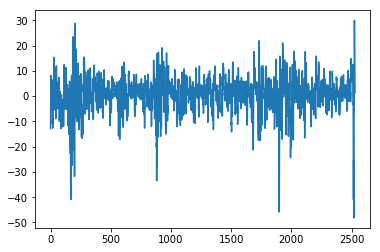

In [10]:
plt.plot(delta)
plt.show()

In [38]:
import numpy
print numpy.average(delta)
print numpy.std(delta)
mu = numpy.average(delta)
import matplotlib
variance = 0
sigma = numpy.std(t)
x = numpy.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.show()

0.0179316027996
0.226920554545


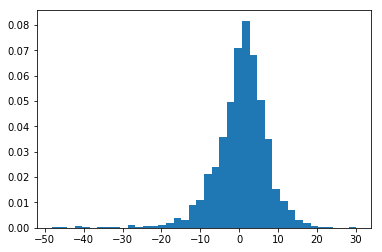

In [11]:
plt.hist(delta,bins=40,normed=True)
#plt.plot(x,matplotlib.mlab.normpdf(x, mu, sigma))
plt.show()

In [54]:
weights = numpy.ones_like(delta)/float(len(delta))
plt.hist(delta, weights=weights,bins=50)
plt.plot(x,numpy.normpdf(x, mu, sigma))
plt.show()

AttributeError: 'module' object has no attribute 'normpdf'

In [37]:
import statsmodels
import statsmodels.graphics.tsaplots as tf

In [42]:
def autocorr(x, t=2):
    return numpy.corrcoef(numpy.asarray([x[0:len(x)-t], x[t:len(x)]]))

In [39]:
x = autocorr(prices)

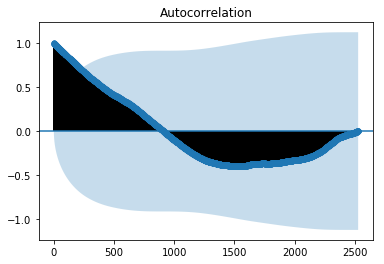

In [40]:
tf.plot_acf(prices)

In [43]:
print(autocorr(prices))

[[ 1.          0.99967318]
 [ 0.99967318  1.        ]]


In [ ]:
#statsmodels, numpy, matplotlib, scipy